In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.stats import norm, chi2, t, uniform, skewnorm

In [3]:
# define a function to compute the JB statistic, return the statistic and p-value
def JB_statistics(X):
    """
    Input:
        X: A numpy array of shape (N, n) where N is the number of samples 
        and n is sample size
    Output:
        JB_statistic: A numpy array of shape (N,) containing the JB statistic for each sample
        p-value: A numpy array of shape (N,) containing the p-value for each sample
    """
    n = X.shape[1]
    JB_skewness = np.sqrt(n / 6) * skew(X, axis=1, bias=False)
    JB_kurtosis = np.sqrt(n / 24) *kurtosis(X, axis=1, bias=False, \
                                            fisher=True)
    JB_statistic = JB_skewness**2 + JB_kurtosis**2
    p_value = 1 - chi2.cdf(JB_statistic, 2)
    return JB_statistic, p_value

# Define the distributions and their parameters
# create a dictionary as above, but use scipy.stats to generate the random numbers  
distributions = {
    'Normal': lambda size: norm.rvs(size=size),
    'T(3)': lambda size: t.rvs(df=3, size=size),
    'T(10)': lambda size: t.rvs(df=10, size=size),
    'T(30)': lambda size: t.rvs(df=30, size=size),
    'Uniform': lambda size: uniform.rvs(loc=-3, scale=6, size=size),
    'Chi_2(20)': lambda size: chi2.rvs(df=20, size=size),
    'skewed Normal(2)': lambda size: skewnorm.rvs(a=2, loc=0, scale=1, size=size),
    'skewed Normal(-4)': lambda size: skewnorm.rvs(a=-4, loc=0, scale=1, size=size)
}

# Function to generate data from a specified distribution
def generate_data(distribution_name, size):
    if distribution_name in distributions:
        return distributions[distribution_name](size)
    else:
        raise ValueError(f"Distribution '{distribution_name}' is not supported.")



In [4]:
from scipy.stats import norm, jarque_bera, shapiro, normaltest, anderson, kstest
# function to perform normality tests
def perform_normality_tests(data):
    '''
    Input:
        data: A numpy array of shape (N, n) where N is the number of samples 
        and n is sample size
    Output:
        results: A dictionary containing the results of the normality tests
    '''
    results = {}
    # JB statistics
    jb_stat, jb_p = JB_statistics(data)
    results['JB statistics'] = (jb_stat, jb_p)
    # Jarque-Bera test
    jb_stat, jb_p = jarque_bera(data, axis=1)
    results['Jarque-Bera'] = (jb_stat, jb_p)
    # Shapiro-Wilk test
    shapiro_stat, shapiro_p = shapiro(data, axis=1)
    results['Shapiro-Wilk'] = (shapiro_stat, shapiro_p)
    # D'Agostino's K-squared test
    dagostino_stat, dagostino_p = normaltest(data, axis=1)
    results["D'Agostino's K-squared"] = (dagostino_stat, dagostino_p)
    # Anderson-Darling test
    # anderson_result = anderson(data, dist='norm')
    # results['Anderson-Darling'] = anderson_result
    # Kolmogorov-Smirnov test
    ks_stat, ks_p = kstest(data, 'norm', axis=1)
    results['Kolmogorov-Smirnov'] = (ks_stat, ks_p)
    return results

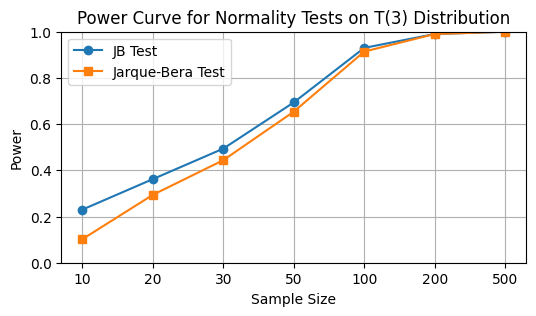

In [ ]:
# generate samples from T(3) distribution
# np.random.seed(0)
n = [10, 20, 30, 50, 100, 200, 500]
N = 500
alpha = 0.05
Power = np.zeros((2, len(n)))
Ha = ['T(3)', 'T(10)', 'Uniform', 'Chi_2(20)', \
      'skewed Normal(2)', 'skewed Normal(-4)']


for sample_size in n:
    dist = 'T(3)'
    X = generate_data(dist, (N, sample_size))
    JB_stat, JB_p = JB_statistics(X)
    Power[0, n.index(sample_size)] = np.mean(JB_p < alpha)
    # print(f"Sample Size: {sample_size}, JB Test Power for T(3) distribution: {JB_power}")
    jb_stat, jb_p = jarque_bera(X, axis=1)
    Power[1, n.index(sample_size)] = np.mean(jb_p < alpha)
    # print(f"Sample Size: {sample_size}, Jarque-Bera Test Power for T(3) distribution: {jb_power}")
# print(Power)
# draw the power curve
fig = plt.figure(figsize=(6, 3))
plt.plot(Power[0, :], marker='o', label='JB Test')
plt.plot(Power[1, :], marker='s', label='Jarque-Bera Test')

plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title(f'Power Curve for Normality Tests on {dist} Distribution')
plt.xticks(ticks=range(len(n)), labels=n)
plt.grid()
if dist == 'Normal':
    # draw horizontal line at alpha level
    plt.axhline(y=alpha, color='r', linestyle='--')
    plt.ylim(0, 0.1)
else:
    plt.ylim(0, 1)
plt.legend()
plt.show()
